<a href="https://colab.research.google.com/github/Lanlanb/Studycase/blob/main/DicodingCollection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Wrangling** DicodingCollection

![Logo DiCo](https://drive.google.com/uc?id=1RXRdLO-vu8bxP9xJldegVldsi1BxX4CZ)

*Dataset dapat ditemukan di [sini](https://github.com/dicodingacademy/dicoding_dataset/tree/main/DicodingCollection)*.

**Description**: Dicoding Collection, atau yang lebih dikenal sebagai DiCo, adalah perusahaan yang beroperasi di sektor fashion, memproduksi beragam item fashion dan mendistribusikannya melalui platform online. Sebagai entitas yang mengedepankan inovasi, DiCo menyadari bahwa pemanfaatan data merupakan elemen kunci dalam pengembangan bisnis. Oleh karena itu, perusahaan ini mengelola seluruh riwayat penjualan serta informasi yang berkaitan dengan produk dan pelanggan dalam sebuah basis data yang terstruktur. Basis data tersebut terdiri dari empat tabel utama.

**Struktur Data**:

```
DicodingCollection
├── Tabel Customers - menyimpan informasi pelanggan
│   ├── customer_id
│   ├── customer_name
│   ├── gender
│   ├── age
│   ├── home_address
│   ├── zip_code
│   ├── city
│   ├── state
│   └── country
│
├── Tabel Orders - berisi informasi tentang pesanan pelanggan
│   ├── order_id
│   ├── customer_id
│   ├── payment p
│   ├── order_date
│   └── delivery_date
│
├── Tabel Products - menyimpan data produk yang dikeluarkan
│   ├── product_id
│   ├── product_type
│   ├── product_name
│   ├── size
│   ├── colour
│   ├── price
│   ├── quantity
│   └── description
│
└── Tabel Sales - menyimpan data transaksi penjualan
    ├── sales_id
    ├── order_id
    ├── product_id
    ├── price_per_unit
    ├── quantity
    └── total_price
```
____

## Gathering Data

In [ ]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# import dataset
cust = pd.read_csv("https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/refs/heads/main/DicodingCollection/customers.csv")
order = pd.read_csv("https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/refs/heads/main/DicodingCollection/orders.csv")
product = pd.read_csv("https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/refs/heads/main/DicodingCollection/products.csv")
sales = pd.read_csv("https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/refs/heads/main/DicodingCollection/sales.csv")

In [ ]:
# mendefinisikan dictionary untuk mempermudah definisi lainnya
datasets = {
       'customers': cust,
       'orders': order,
       'products': product,
       'sales':sales }

In [ ]:
dat = []

# Menyusun informasi struktur dataset
for name, data in datasets.items():
    # Mendapatkan daftar kolom
    columns = data.columns.tolist()  # Menggunakan .tolist() untuk mendapatkan daftar kolom
    # Menambahkan informasi ke dalam list
    dat.append({
        'dataset_name': name,
        'columns': columns,
        'num_rows': data.shape[0]  # Menyimpan jumlah baris
    })

# Menampilkan struktur dataset
print("Struktur dataset yang ada adalah:")
for dataset in dat:
    print(f"• Dataset: {dataset['dataset_name']} \nKolom: {dataset['columns']}, Jumlah Baris: {dataset['num_rows']}")

Struktur dataset yang ada adalah:
• Dataset: customers 
Kolom: ['customer_id', 'customer_name', 'gender', 'age', 'home_address', 'zip_code', 'city', 'state', 'country'], Jumlah Baris: 1007
• Dataset: orders 
Kolom: ['order_id', 'customer_id', 'payment', 'order_date', 'delivery_date'], Jumlah Baris: 1000
• Dataset: products 
Kolom: ['product_id', 'product_type', 'product_name', 'size', 'colour', 'price', 'quantity', 'description'], Jumlah Baris: 1266
• Dataset: sales 
Kolom: ['sales_id', 'order_id', 'product_id', 'price_per_unit', 'quantity', 'total_price'], Jumlah Baris: 5000


In [ ]:
for name, data in datasets.items():
    print(f"{name} area ============")  # Menampilkan header dengan nama dataset
    print(data.head())  # Menampilkan 5 baris pertama secara default dari dataset
    print("\n")

customers area ============
   customer_id customer_name             gender  age  \
0            1       fulan 1             Female   30   
1            2       fulan 2  Prefer not to say   69   
2            3       fulan 3  Prefer not to say   59   
3            4       fulan 4  Prefer not to say   67   
4            5       fulan 5  Prefer not to say   30   

                     home_address  zip_code               city  \
0  8606 Victoria TerraceSuite 560      5464      Johnstonhaven   
1      8327 Kirlin SummitApt. 461      8223    New Zacharyfort   
2       269 Gemma SummitSuite 109      5661           Aliburgh   
3       743 Bailey GroveSuite 141      1729  South Justinhaven   
4         48 Hyatt ManorSuite 375      4032     Griffithsshire   

                          state    country  
0            Northern Territory  Australia  
1               South Australia  Australia  
2  Australian Capital Territory  Australia  
3                    Queensland  Australia  
4            

## Assesing Data

In [ ]:
for name, data in datasets.items():
    print(f"{name} area ============")  # pembatas looping
    print(data.info())  # Menampilkan general information dari dataset
    print("\n")

customers area ============
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    1007 non-null   int64 
 1   customer_name  1007 non-null   object
 2   gender         989 non-null    object
 3   age            1007 non-null   int64 
 4   home_address   1007 non-null   object
 5   zip_code       1007 non-null   int64 
 6   city           1007 non-null   object
 7   state          1007 non-null   object
 8   country        1007 non-null   object
dtypes: int64(3), object(6)
memory usage: 70.9+ KB
None


orders area ============
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   order_id       1000 non-null   int64 
 1   customer_id    1000 non-null   int64 
 2   payment        1000 non-null

In [ ]:
for name, data in datasets.items():
    print(f"{name} area ============")
    print(data.describe())  # Menampilkan deskripsi statistik dari dataset
    print("\n")  # Menambahkan baris kosong untuk pemisah antar output

customers area ============
       customer_id          age     zip_code
count  1007.000000  1007.000000  1007.000000
mean    501.726912    50.929494  5012.538232
std     288.673238    30.516299  2885.836112
min       1.000000    20.000000     2.000000
25%     252.500000    34.000000  2403.500000
50%     502.000000    50.000000  5087.000000
75%     751.500000    65.000000  7493.500000
max    1000.000000   700.000000  9998.000000


orders area ============
          order_id  customer_id       payment
count  1000.000000  1000.000000   1000.000000
mean    500.500000   506.640000  33972.936000
std     288.819436   277.115502  14451.609047
min       1.000000     1.000000  10043.000000
25%     250.750000   275.250000  21329.250000
50%     500.500000   515.000000  33697.500000
75%     750.250000   737.250000  46249.000000
max    1000.000000  1000.000000  59910.000000


products area ============
        product_id        price     quantity
count  1266.000000  1266.000000  1266.000000
mean   

**Analisis**:
1. Dari jumlah nilai Non-Null Count, ditemukan bahwa variabel gender pada tabel Cust dan total_price pada tabel Sales memiliki perbedaan jumlah data. Hal ini mengindikasikan adanya missing value, yang mungkin terjadi karena data tidak terekam dengan baik dalam sistem.
2. Variabel order_date dan delivery_date pada tabel Order memiliki tipe data object, padahal seharusnya bertipe datetime. Perlu dilakukan konversi tipe data agar sesuai dengan konteks.
3. Pada tabel Cust, ditemukan bahwa variabel age memiliki nilai maksimum 700, yang secara logika tidak mungkin benar karena manusia tidak bisa mencapai usia tersebut. Ini menandakan adanya kesalahan pengisian data.
5. Analisis ini menunjukkan pentingnya dilakukan cleaning data sebelum dilakukan analisis lebih lanjut.

### checking missing value

Pengecekan missing value dari keempat table yang ada akan tetap dilakukan, walaupun dengan menggunakan informasi umum seperti yang telah dilakukan sebelumnya telah menunjukkan keberadaan missing value, pengecekan nilai harus dilakukan agar data yang dianalisis dapat menjadi data yang bersih dan siap digunakan untuk ke tahap selanjutnya.

In [ ]:
missing = [] # list kosong buat menampung hasil looping, in the case is persebaran nilai 0

for name, data in datasets.items():
    nan = data.isnull().sum().sort_values(ascending=False)
    percent = (nan / len(data) * 100).sort_values(ascending=False)
    combined = pd.concat([nan, percent], axis=1, keys=['Total', 'Percent'])
    combined['Table'] = name
    missing.append(combined)

missing = pd.concat(missing)
missing

,Total,Percent,Table
gender,18,1.787488,customers
customer_id,0,0.000000,customers
customer_name,0,0.000000,customers
age,0,0.000000,customers
home_address,0,0.000000,customers
zip_code,0,0.000000,customers
city,0,0.000000,customers
state,0,0.000000,customers
country,0,0.000000,customers
order_id,0,0.000000,orders


Dari output di atas, telah dipastikan bahwa table yang mengandung nilai 0 ialah cust dan sales, dengan persentase nilai sebesar 1.7 % dan 0.38%, yang mana hal itu tidak mewakili dataset atau bisa dibilang tidak memiliki pengaruh signifikan terhadap keseluruhan data yang ada pada dataset. Akan tetapi, penyebab mengapa variabel gender dan total_price memiliki nilai 0, tidak seperti variabel lainnya akan sangat penting untuk diketahui. Sebab hal tersebut dapat mengindikasikan adanya outlier dan imbalanced data.

#### gender analysis

In [ ]:
cust['gender'].unique()

array(['Female', 'Prefer not to say', 'Male', nan], dtype=object)

In [ ]:
cust['gender'].value_counts()

,count
gender,
Prefer not to say,731
Male,143
Female,115


In [ ]:
nan_variabel = cust[cust.isnull().any(axis=1)]
nan_variabel.sample(10)

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
952,946,fulan 946,NaN,24,8227 Nicholas HillSuite 150,115,South Jasper,Queensland,Australia
798,795,fulan 795,NaN,49,487 Summer MewsApt. 874,1712,East Hayden,Australian Capital Territory,Australia
393,393,fulan 393,NaN,34,5158 Levi HillSuite 531,1474,Johnsburgh,Queensland,Australia
801,798,fulan 798,NaN,56,27 Aiden KnollApt. 875,6531,Port Sam,Australian Capital Territory,Australia
994,988,fulan 988,NaN,35,1130 Turner Estate DrSuite 925,9386,New Harry,Western Australia,Australia
745,743,fulan 743,NaN,57,09 Christopher StreetSuite 967,6226,Lake Lukemouth,Western Australia,Australia
859,855,fulan 855,NaN,55,603 O'keefe KnollSuite 782,8822,Port Dylanmouth,Tasmania,Australia
914,909,fulan 909,NaN,62,976 Murray Station StApt. 036,3227,Langfort,Tasmania,Australia
722,720,fulan 720,NaN,40,31 Jordan ParadeApt. 400,1380,West Henry,South Australia,Australia
773,771,fulan 771,NaN,74,7367 Wright JunctionApt. 773,8882,Kuhntown,Victoria,Australia


In [ ]:
not_nan_variabel = cust[cust.notnull().any(axis=1)]
not_nan_variabel

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
0,1,fulan 1,Female,30,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory,Australia
1,2,fulan 2,Prefer not to say,69,8327 Kirlin SummitApt. 461,8223,New Zacharyfort,South Australia,Australia
2,3,fulan 3,Prefer not to say,59,269 Gemma SummitSuite 109,5661,Aliburgh,Australian Capital Territory,Australia
3,4,fulan 4,Prefer not to say,67,743 Bailey GroveSuite 141,1729,South Justinhaven,Queensland,Australia
4,5,fulan 5,Prefer not to say,30,48 Hyatt ManorSuite 375,4032,Griffithsshire,Queensland,Australia
...,...,...,...,...,...,...,...,...,...
1002,996,fulan 996,Prefer not to say,59,0433 Armstrong HillSuite 974,7613,Lake Danielland,Tasmania,Australia
1003,997,fulan 997,Prefer not to say,30,04 Howell PassSuite 209,6950,Ellaborough,Tasmania,Australia
1004,998,fulan 998,Prefer not to say,32,72 Annabelle PassApt. 446,52,Kohlerberg,Queensland,Australia
1005,999,fulan 999,Prefer not to say,30,170 Wilson AvenueApt. 577,7849,East Oscarfurt,Western Australia,Australia



**Analisa**:
Pertama, dalam table cust, variabel gender memiliki 3 kategori yang dapat dipilih oleh pengguna, yakni:

* **Female**: Menandakan pengguna adalah perempuan.
* **Male**: Menandakan pengguna adalah laki-laki.
* **Prefer not to say**: Menandakan pengguna memilih untuk tidak menyatakan gender mereka.

Dalam hal ini, adanya nilai nan mungkin mengindikasikan adanya kategori keempat, akan tetapi, sudah ada 3 kategori yang mewakili variabel gender. Nilai NaN dalam konteks gender terasa tidak masuk akal karena sudah ada pilihan "Prefer not to say" yang seharusnya mencakup kasus di mana pengguna memilih untuk tidak menyatakan gender mereka. Dengan demikian, NaN bukanlah hasil dari pilihan pengguna (muncul karena kategori baru), melainkan lebih karena: kesalahan teknis, lroses pengumpulan data yang tidak sempur.na ataupun masalah dalam input/output.

#### sales analysis

In [ ]:
sales['total_price'].nunique()

69

In [ ]:
sales['total_price'].value_counts()

,count
total_price,
186.0,113
192.0,112
357.0,104
210.0,101
354.0,100
...,...
90.0,40
115.0,38
321.0,37


In [ ]:
nan_variabel = sales[sales.isnull().any(axis=1)]
nan_variabel

,sales_id,order_id,product_id,price_per_unit,quantity,total_price
9,9,2,1196,105,1,NaN
121,121,27,1027,90,3,NaN
278,278,63,360,94,2,NaN
421,421,95,1091,115,1,NaN
489,489,108,1193,105,3,NaN
539,539,117,405,119,2,NaN
636,636,134,653,93,3,NaN
687,687,145,1138,102,1,NaN
854,854,177,64,104,1,NaN
1079,1079,222,908,94,3,NaN


##### not nan variabel

In [ ]:
not_nan_variabel = sales[sales.notnull().any(axis=1)]
not_nan_variabel

,sales_id,order_id,product_id,price_per_unit,quantity,total_price
0,0,1,218,106,2,212.0
1,1,1,481,118,1,118.0
2,2,1,2,96,3,288.0
3,3,1,1002,106,2,212.0
4,4,1,691,113,3,339.0
...,...,...,...,...,...,...
4995,4995,998,321,109,2,218.0
4996,4996,998,251,95,3,285.0
4997,4997,999,872,113,1,113.0
4998,4998,999,998,106,2,212.0


In [ ]:
true_sample = not_nan_variabel.sample(5)
true_sample

,sales_id,order_id,product_id,price_per_unit,quantity,total_price
4663,4663,935,843,113,1,113.0
3025,3025,607,1053,93,3,279.0
1708,1708,348,349,109,2,218.0
4107,4107,816,595,112,3,336.0
1966,1966,394,1004,106,3,318.0


In [ ]:
price_per_unit = true_sample['price_per_unit'].values
quantity = true_sample['quantity'].values
total_price = true_sample['total_price'].values

# Loop untuk mengecek setiap baris
for price, qty, total in zip(price_per_unit, quantity, total_price):
    print(f"price: {price}")
    print(f"quantity: {qty}")
    calculate = price * qty
    print(f"total price (calculated): {calculate}")
    print(f"total price (original): {total}")

    # menggunakan toleransi kecil untuk perbandingan nilai floating-point
    if np.isclose(calculate, total, atol=0.01):  # atol = absolute tolerance
        print("=== True: The calculated total matches the original total.\n")
    else:
        print("=== False: There is a discrepancy between calculated and original total.\n")

price: 113
quantity: 1
total price (calculated): 113
total price (original): 113.0
=== True: The calculated total matches the original total.

price: 93
quantity: 3
total price (calculated): 279
total price (original): 279.0
=== True: The calculated total matches the original total.

price: 109
quantity: 2
total price (calculated): 218
total price (original): 218.0
=== True: The calculated total matches the original total.

price: 112
quantity: 3
total price (calculated): 336
total price (original): 336.0
=== True: The calculated total matches the original total.

price: 106
quantity: 3
total price (calculated): 318
total price (original): 318.0
=== True: The calculated total matches the original total.



Dari hasil di atas, dapat dipastikan bahwa total_price secara default dapat diperoleh melalui harga per-satu unit barang dikalikan dengan jumlah barang yang dibeli. Dengan kata lain, dengan tidak adanya variabel yang memiliki nilai Nan selain variabel total_price (dari analisa sebelumnya), maka adapun penyebab total_price memiliki nilai nan adalah karena data tersebut tidak terekam dengan baik.

```
Contoh:
price_per_unit = 113.0
quantity = 2
total_price = NaN
```

Dalam hal ini, data untuk harga per unit dan kuantitas tersedia, dan jika dilakukan perhitungan manual, kita bisa mengalikan harga per unit dengan kuantitas (113.0 * 2 = 226.0). Namun, karena kolom total_price tidak terisi, ada indikasi bahwa sistem tidak melakukan penghitungan yang benar atau ada kesalahan dalam input/output data yang menyebabkan data tidak terekam (disimpan secara otomatis oleh sistem) dengan benar.

Untuk lebih jelasnya, perhitungan kepada 5 sample acak yang memiliki nilai nan akan dilakukan untuk lebih memahami bagaimana persebaran data tersebut.

##### nan variabel

In [ ]:
random_sample = nan_variabel.sample(5)
random_sample

,sales_id,order_id,product_id,price_per_unit,quantity,total_price
1902,1902,381,1218,105,3,NaN
121,121,27,1027,90,3,NaN
2347,2347,476,696,113,2,NaN
854,854,177,64,104,1,NaN
539,539,117,405,119,2,NaN


In [ ]:
price_per_unit = random_sample['price_per_unit'].values
quantity = random_sample['quantity'].values
for price, qty in zip(price_per_unit, quantity):
    print(f"price: {price}")
    print(f"quantity: {qty}")
    calculate = price * qty
    print(f"total price (calculated) is {calculate}\n")

price: 105
quantity: 3
total price (calculated) is 315

price: 90
quantity: 3
total price (calculated) is 270

price: 113
quantity: 2
total price (calculated) is 226

price: 104
quantity: 1
total price (calculated) is 104

price: 119
quantity: 2
total price (calculated) is 238



In [ ]:
calculate = price_per_unit * quantity
calculate

array([270, 238, 117, 300, 282])


Analisa:
1. Pertama, dalam table cust, variabel gender memiliki 3 kategori yang dapat dipilih oleh pengguna. ada female untuk perempuan, male untuk laki-laki dan Prefer not say jika pengguna tidak ingin/memilin untuk tidak mengatakannya. Tentu saja terdapat 4 kategori jika nilai nan dihitung. Dalam hal ini, adanya nilai nan mungkin mengindikasikan adanya kategori keempat, akan tetapi, sudah ada 3 kategori yang mewakili variabel gender. karena itulah mustahil rasanya jika nilai nan tersebut ada karena memang tidak ada data yang diisikan pengguna dalam variabel gender, sementara variabel lainnya terisi. Dan untuk indikasi lain, penyebab data memiliki nilai nan mungkin saja karena tidak terekam dalam sistem.
2. Kedua, dalam table sales, variabel total_price memiliki persentase yang sedikit lebih banyak dari variabel gender. Hall itu setidaknya menjadi gambaran singkat bahwa meskipun jumlah missing value yang ditemukan sedikit, namun itu tetap terjadi dalam data. Adapun kemungkinan penyebab kemunculan nilai nan dalam data ialah karena data tersebut juga tidak terekam dengan sempurna dalam sistem. sebagai contoh, untuk mengetahui total harga yang harus dibayarkan, secara kasar dapat diketahui dengan mengitung harga per-satu barang dengan jumlah barang yang dibeli. Dan berdasarkan sample yang telah diambil, hal tersebut terbukti benar.

### Checking Duplicated Value

In [ ]:
data_table = []
data_total = []

for name, data in datasets.items():
    duplicates = data.duplicated().sum()
    data_table.append(name)
    data_total.append(duplicates)

duplicates = pd.DataFrame({'table': data_table, 'totals': data_total})
duplicates

,table,totals
0,customers,6
1,orders,0
2,products,6
3,sales,0


In [ ]:
cust[cust.duplicated()]

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
317,304,fulan 304,Prefer not to say,79,5306 Hickle MewsApt. 405,7906,Feeneymouth,Queensland,Australia
551,497,fulan 497,Prefer not to say,31,0487 Jordan TerraceSuite 509,9290,North Aidentown,Northern Territory,Australia
712,637,fulan 637,Prefer not to say,58,8007 Joel SquareApt. 874,7700,Lilystad,Western Australia,Australia
781,742,fulan 742,Prefer not to say,44,275 Maddison Estate DrApt. 642,8642,Port Aliview,Western Australia,Australia
856,808,fulan 808,Prefer not to say,35,4277 Ryan IslandSuite 792,4197,Robertstown,Western Australia,Australia
907,808,fulan 808,Prefer not to say,35,4277 Ryan IslandSuite 792,4197,Robertstown,Western Australia,Australia


In [ ]:
product[product.duplicated()]

,product_id,product_type,product_name,size,colour,price,quantity,description
112,54,Shirt,Dress,XL,green,119,52,"A green coloured, XL sized, Dress Shirt"
232,146,Shirt,Linen,S,orange,116,42,"A orange coloured, S sized, Linen Shirt"
365,146,Shirt,Linen,S,orange,116,42,"A orange coloured, S sized, Linen Shirt"
435,377,Shirt,Henley,M,indigo,92,70,"A indigo coloured, M sized, Henley Shirt"
540,483,Jacket,Puffer,L,indigo,110,61,"A indigo coloured, L sized, Puffer Jacket"
587,579,Jacket,Bomber,XL,green,90,79,"A green coloured, XL sized, Bomber Jacket"


### Checking Inaccurate data

#### age

In [ ]:
cust.describe()

,customer_id,age,zip_code
count,1007.000000,1007.000000,1007.000000
mean,501.726912,50.929494,5012.538232
std,288.673238,30.516299,2885.836112
min,1.000000,20.000000,2.000000
25%,252.500000,34.000000,2403.500000
50%,502.000000,50.000000,5087.000000
75%,751.500000,65.000000,7493.500000
max,1000.000000,700.000000,9998.000000


Sebelumnya, telah diketahui bahwa hasil yang tidak akurat disebabkan kemungkinan besar karena human error sehingga memasukkan terlalu banyak angka 0. Adapun untuk mengatasi adalah dengan mengganti data yang tidak akurat menjadi

count    1007.000000
mean       50.929494
std        30.516299
min        20.000000
25%        34.000000
50%        50.000000
75%        65.000000
max       700.000000
Name: age, dtype: float64


<Axes: xlabel='age'>

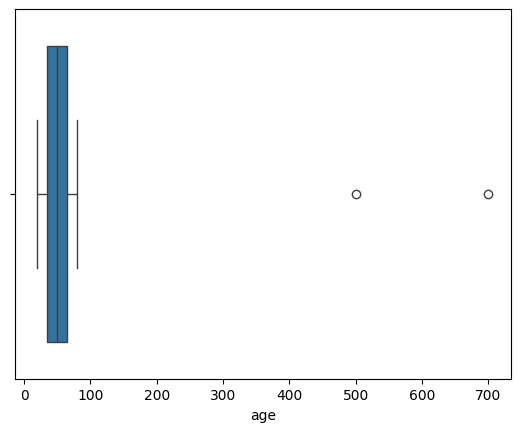

In [ ]:
# Menampilkan statistik deskriptif
print(cust['age'].describe())

# Visualisasi boxplot untuk mendeteksi outlier
import seaborn as sns
sns.boxplot(x=cust['age'])

Median dan meannya menunjuk ke angk 50, walaupun mean tidak secara spesifik menujukkan angka 50 tepat, hal tersebut tetap menunjukkan bahwa data tersebar di sekitar usia 50 tahun. Dengan usia paling muda yakni 20 tahun, seperempatnya ada di rentang 21 - 34 tahun. Hingga usia dewasa yang ada di akhir 60-an. Hal tersebut menunjukkan bahwa data tersebar cukup variatif jika tidak menghitung adanya outlier dalam persebaran plot—Melihat kembali usia maksimal/tertinggi yakni 700 tahun, yang jelas tidak realistis.

In [ ]:
cust[cust['age'] > 50]

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
1,2,fulan 2,Prefer not to say,69,8327 Kirlin SummitApt. 461,8223,New Zacharyfort,South Australia,Australia
2,3,fulan 3,Prefer not to say,59,269 Gemma SummitSuite 109,5661,Aliburgh,Australian Capital Territory,Australia
3,4,fulan 4,Prefer not to say,67,743 Bailey GroveSuite 141,1729,South Justinhaven,Queensland,Australia
6,7,fulan 7,Prefer not to say,76,92 Hills Station StApt. 683,793,Masonfurt,Queensland,Australia
7,8,fulan 8,Prefer not to say,75,383 Muller SummitSuite 809,7681,Samside,Northern Territory,Australia
...,...,...,...,...,...,...,...,...,...
995,989,fulan 989,Prefer not to say,53,9003 Gemma RidgeApt. 954,698,Stewartland,Australian Capital Territory,Australia
1000,994,fulan 994,Female,53,3128 Ivy CircleSuite 713,508,Hallshire,Western Australia,Australia
1001,995,fulan 995,Prefer not to say,63,19 Jordan Station StSuite 655,3742,Hermistonberg,Western Australia,Australia
1002,996,fulan 996,Prefer not to say,59,0433 Armstrong HillSuite 974,7613,Lake Danielland,Tasmania,Australia



Plot yang digambarkan tidak menunjukkan adanya pelanggan yang mencapai usia 100 tahun, karena itu, mari tetapkan usia 50 dan di atas 100 tahun menjadi batas normal umur manusia.

In [ ]:
cust[cust['age'] > 100]

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
215,216,fulan 216,Prefer not to say,500,038 Haley MewsApt. 810,3991,Bayertown,Northern Territory,Australia
967,961,fulan 961,Prefer not to say,700,29 Farrell ParadeSuite 818,6528,New Joseph,South Australia,Australia


Data di atas adalah outlier yang sama yang ada pada plot 👆🏻

#### order

In [ ]:
order

,order_id,customer_id,payment,order_date,delivery_date
0,1,64,30811,2021-8-30,2021-09-24
1,2,473,50490,2021-2-3,2021-02-13
2,3,774,46763,2021-10-8,2021-11-03
3,4,433,39782,2021-5-6,2021-05-19
4,5,441,14719,2021-3-23,2021-03-24
...,...,...,...,...,...
995,996,345,37843,2021-1-13,2021-02-02
996,997,346,53831,2021-1-18,2021-01-31
997,998,407,53308,2021-5-5,2021-05-21
998,999,428,31643,2021-6-15,2021-07-12


In [ ]:
order.dtypes

,0
order_id,int64
customer_id,int64
payment,int64
order_date,object
delivery_date,object


Pada variabel order_date dan delivery_date, informasi yang disimpan adalah tanggal terkait pemesanan atau transaksi. Dalam kasus ini, tipe data yang digunakan untuk kedua kolom tersebut adalah object. Namun, penggunaan tipe data ini tidak tepat untuk konteks analisis yang dilakukan, di mana seharusnya tipe data yang lebih sesuai adalah datetime.

## Conclusion so far~

In [ ]:
summary = []

for name, data in datasets.items():
    # Cek duplikasi di seluruh variabel/kolom
    duplicates = data.duplicated().sum()
    if duplicates > 0:
       summary.append([name, 'Semua variabel', f'Duplicated data sebanyak {duplicates}', 'Menangani data duplikat (drop)'])

    # Cek missing value per kolom
    for col in data.columns:
        missing_value = data[col].isna().sum()
        if missing_value > 0:
           summary.append([name, col, f'Missing value sebanyak {missing_value}', 'Menangani sesuai case'])

    # Analisis khusus per tabel
    if name == 'customers':  # Tabel Cust
       if (data['age'] > 100).any():  # Kolom age tidak masuk akal jika ada yang usianya lebih dari 100 tahun
          summary.append([name, 'age', 'Usia tidak realistis', 'Perbaiki kesalahan entri data'])

    if name == 'orders':  # Tabel Order
       summary.append([name, 'order_date dan delivery_date', 'Kesalahan tipe data (harusnya datetime)', 'Ubah menjadi tipe datetime'])

summary_data = pd.DataFrame(summary, columns=['Tabel', 'Variabel', 'Masalah', 'Tindakan'])
print(f"Adapun {summary_data.shape[0]} point yang dikumpulkan dari analisis di atas:")
summary_data

Adapun 6 point yang dikumpulkan dari analisis di atas:


,Tabel,Variabel,Masalah,Tindakan
0,customers,Semua variabel,Duplicated data sebanyak 6,Menangani data duplikat (drop)
1,customers,gender,Missing value sebanyak 18,Menangani sesuai case
2,customers,age,Usia tidak realistis,Perbaiki kesalahan entri data
3,orders,order_date dan delivery_date,Kesalahan tipe data (harusnya datetime),Ubah menjadi tipe datetime
4,products,Semua variabel,Duplicated data sebanyak 6,Menangani data duplikat (drop)
5,sales,total_price,Missing value sebanyak 19,Menangani sesuai case


## Cleaning Data

### handling missing value

#### genre handling

In [ ]:
gender_distribution = cust['gender'].value_counts()
print(gender_distribution)

gender
Prefer not to say    731
Male                 143
Female               115
Name: count, dtype: int64


In [ ]:
cust['gender'].isnull().sum()

18

In [ ]:
cust['gender'].fillna('Prefer not to say', inplace=True)

In [ ]:
cust['gender'].isnull().sum()

0

In [ ]:
gender_distribution = cust['gender'].value_counts()
print(gender_distribution)

gender
Prefer not to say    749
Male                 143
Female               115
Name: count, dtype: int64


Untuk hasilnya, missing value telah berhasil di imputasi pada variabel genre.
____

#### total price handling

In [ ]:
sales['total_price'].isna().sum()

19

In [ ]:
sales['total_price'] = sales.apply(
    lambda row: row['price_per_unit'] * row['quantity'] if pd.isna(row['total_price']) else row['total_price'], axis=1
)

In [ ]:
sales['total_price']

,total_price
0,212.0
1,118.0
2,288.0
3,212.0
4,339.0
...,...
4995,218.0
4996,285.0
4997,113.0
4998,212.0


In [ ]:
missing

,Total,Percent,Table
customer_id,0,0.0,customers
customer_name,0,0.0,customers
gender,0,0.0,customers
age,0,0.0,customers
home_address,0,0.0,customers
zip_code,0,0.0,customers
city,0,0.0,customers
state,0,0.0,customers
country,0,0.0,customers
order_id,0,0.0,orders


Data yang kosong sudah tidak ada lagi!

### Handling Duplicate Data

In [ ]:
duplicates

,table,totals
0,customers,6
1,orders,0
2,products,6
3,sales,0


In [ ]:
cust.drop_duplicates(inplace=True)
product.drop_duplicates(inplace=True)

Proses penghapusan duplikasi berjalan dengan lancar, kemudian untuk memeriksa apakah data yang duplicat sudah sepenuhnya terhapus, hasilnya dapat dilihat di bawah ini;

In [ ]:
duplicates

,table,totals
0,customers,0
1,orders,0
2,products,0
3,sales,0


### handling inaccurate data

#### age

In [ ]:
summary_data.iloc[2]

,2
Tabel,customers
Variabel,age
Masalah,Usia tidak realistis
Tindakan,Perbaiki kesalahan entri data


Batas usia wajar yang sebelumnya ditetapkan adalah di bawah 100 tahun. Dengan anggapan seseorang yang berusia di atas 100 tahun tidak realistis atau bukan hal yang biasa diketahui sehari-hari, penanganan seharusnya lebih mudah karena pada variabel age secara tidak langsung sebuah kategori atau class telah terbentuk, yakni:
```
* Usia anak-anak: 0 - 12 tahun
* Usia remaja: 13 - 19 tahun
* Usia dewasa muda: 20 - 35 tahun #25% of data or q1
* Usia dewasa: 36 - 50 tahun # 50% of data or q2, median and mean (menujukkan data simetris dan ada ada variasi)
* Usia paruh baya: 51 - 70 tahun # 75% of data or q3
* Usia lanjut: 71 - 100 tahun
* Usia ekstrem: Di atas 100 tahun (dianggap tidak realistis)
```

Namun sekali lagi, pada kasus ini telah diketahui sebelumnya bahwa pelanggan termuda dalam rentang data adalah yang berusia 20 tahun. Kemudian, anggapan ada pelanggan yang merupakan anak-anak dan remaja dapat dihilangkan melalui metode eliminasi.

In [ ]:
cust['age'].describe()

,age
count,1000.00000
mean,50.94000
std,30.59095
min,20.00000
25%,34.00000
50%,50.00000
75%,65.00000
max,700.00000


*What's next?* Setelah melihat kembali informasi statistics dari variabel age, suatu kelas memang sudah terbentuk sejak awal. Oleh karena itu, waktunya eksekusi di lakukan!

In [ ]:
# mengaplikasikannya langsung pada variabel age
# mendefinisikan variabel x sebagai parameter input dari variabel age menggunakan lambda
# pada lambda, adapun ekspresi nya; jika nilai x > 100, maka bagi x dengan angka 10 untuk menormalisasikannya
# kemudian, jika tidak (x <= 100), maka kembalikan nilai aslinya (x) tanpa perubahan apapun
cust['age'] = cust['age'].apply(lambda x: x / 10 if x > 100 else x)

cust['age'].describe() # cek hasilnya apakah ada perubahan

,age
count,1000.000000
mean,49.860000
std,17.647828
min,20.000000
25%,34.000000
50%,50.000000
75%,65.000000
max,80.000000


#### order_date dan delivery_date

In [ ]:
datetime_col = ['order_date', 'delivery_date']

for col in datetime_col:
    order[col] = pd.to_datetime(order[col])

order.dtypes

,0
order_id,int64
customer_id,int64
payment,int64
order_date,datetime64[ns]
delivery_date,datetime64[ns]


Sekarang setelah data telah dibersihkan, waktunya untuk menggabungkan table yang terpisah menjadi dataset yang siap diolah pada tahap exploratory.

In [ ]:
dat

[{'dataset_name': 'customers',
  'columns': ['customer_id',
   'customer_name',
   'gender',
   'age',
   'home_address',
   'zip_code',
   'city',
   'state',
   'country'],
  'num_rows': 1007},
 {'dataset_name': 'orders',
  'columns': ['order_id',
   'customer_id',
   'payment',
   'order_date',
   'delivery_date'],
  'num_rows': 1000},
 {'dataset_name': 'products',
  'columns': ['product_id',
   'product_type',
   'product_name',
   'size',
   'colour',
   'price',
   'quantity',
   'description'],
  'num_rows': 1266},
 {'dataset_name': 'sales',
  'columns': ['sales_id',
   'order_id',
   'product_id',
   'price_per_unit',
   'quantity',
   'total_price'],
  'num_rows': 5000}]

Kemudian seperti yang dilihat terdapat kolom yang sama yang dapat dijadikan kunci untuk menggabungkan data. Yakni customer_id, product_id dan tentu saja quantity. Namun, apakah semudah itu?

* **Inner Merge**: Menghasilkan hanya baris a yang memiliki b.
* **Left Merge**: Menghasilkan semua a, dengan b jika ada (opsional/jika ada yang cocok)
* **Right Merge**: Menghasilkan semua b, dengan a jika ada.
* **Outer Merge**: Menghasilkan semua a dan semua b, mengisi nilai yang tidak ada dengan NaN.

### Data yang siap di eksplorasi

In [ ]:
for name, data in datasets.items():
    print(f"{name} area ============")  # Menampilkan header dengan nama dataset
    print(data.info())  # Menampilkan 5 baris pertama secara default dari dataset
    print("\n")

customers area ============
<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 1006
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   customer_id    1000 non-null   int64  
 1   customer_name  1000 non-null   object 
 2   gender         1000 non-null   object 
 3   age            1000 non-null   float64
 4   home_address   1000 non-null   object 
 5   zip_code       1000 non-null   int64  
 6   city           1000 non-null   object 
 7   state          1000 non-null   object 
 8   country        1000 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 78.1+ KB
None


orders area ============
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       1000 non-null   int64         
 1   customer_id    1000 non-null 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
for name, data in datasets.items():
    path = f"/content/drive/MyDrive/Dicoding/DicodingCollection/Dataset/{name}.csv"
    data.to_csv(path, index=False)
    print(f"Dataframe {name} disimpan di {path}")

Dataframe customers disimpan di /content/drive/MyDrive/Dicoding/DicodingCollection/Dataset/customers.csv
Dataframe orders disimpan di /content/drive/MyDrive/Dicoding/DicodingCollection/Dataset/orders.csv
Dataframe products disimpan di /content/drive/MyDrive/Dicoding/DicodingCollection/Dataset/products.csv
Dataframe sales disimpan di /content/drive/MyDrive/Dicoding/DicodingCollection/Dataset/sales.csv


______
## Conclusion

* Adapun dalam prosesnya, perubahan tipe data yang salah dan proses menangani missing value serta duplicated data telah berhasil dilakukan. Dalam hal ini, penyebaran data cukup variatif dengan banyaknya variabel dalam empat table yang berbeda, yang menujukan kompleksitas sample data yang dianalisis dan pemahaman yang diperlukan dalam penanganan dicodingCollection.
* Selain itu, melalui langkah-langkah seperti assesing data, membuat karakteristik dari kumpulan data tersebut terlihat dengan jelas. Yang membuat data sample dari kasus ini menjadi siap digunakan ke tahapan yang lebih besar. Meskipun, tentu saja, akan ada missing value di beberapa tempat jika dataset di gabungan.
* Selanjutnya, adapun output berupa dataset bersih yang bebas dari missing, duplicated dan Innacurrate value, assets berupa logo dari DicodingCollection akan atau dapat di akses pada [link berikut.](https://drive.google.com/drive/folders/1RVFTDM8jAJLSL7lwYMLsRZpI7KEBr5k_)

![eaaaaa 🏋‍♀️😭](https://media2.giphy.com/media/iMOPOL2SDqQ7VnBqI6/giphy.gif?cid=6c09b952dqehfvlvcx82piytdpvc67cnz80obwga1ejbim3m&ep=v1_internal_gif_by_id&rid=giphy.gif&ct=g)

*The journey has just begun!*

*Feel free to connect with me on [LinkedIn](https://www.linkedin.com/in/bulan-nurlaela), explore my project on
[Github](https://github.com/Lanlanb) or reach out via [Email](mailto:contact@nurlaelabulan.my.id
).*

*Thank you, and I look forward to connecting with you!*